# ePSproc: Aniline nbsphinx testing.

## Set-up

### Load modules

In [1]:
import sys
import os
import numpy as np
import epsproc as ep

from datetime import datetime as dt
timeString = dt.now()

* pyevtk not found, VTK export not available. 
* plotly not found, plotly plots not available. 


### Load data

In [2]:
## File path only, from env var DATAFILE
# dataPath = os.getcwd()
dataFile = os.environ.get('DATAFILE', '')

In [3]:
jobInfo = ep.headerFileParse(dataFile)
molInfo = ep.molInfoParse(dataFile)

*** Job info from file header.

 ePS aniline, batch aniline_wf_0.1-5.1eV_S1geom, orbital orb25_B1
 Aniline Orb 25 (B1) ionization, S1 geom, wavefn run on AntonJr
 E=0.1:0.1:5.1 (51 points)
 Sun Apr 14 12:19:44 EDT 2019

*** Found orbitals
1   1 Ene =     -15.5820 Spin =Alpha Occup =   2.000000
2   2 Ene =     -11.2842 Spin =Alpha Occup =   2.000000
3   3 Ene =     -11.2297 Spin =Alpha Occup =   2.000000
4   4 Ene =     -11.2296 Spin =Alpha Occup =   2.000000
5   5 Ene =     -11.2197 Spin =Alpha Occup =   2.000000
6   6 Ene =     -11.2197 Spin =Alpha Occup =   2.000000
7   7 Ene =     -11.2059 Spin =Alpha Occup =   2.000000
8   8 Ene =      -1.2517 Spin =Alpha Occup =   2.000000
9   9 Ene =      -1.1284 Spin =Alpha Occup =   2.000000
10  10 Ene =      -1.0103 Spin =Alpha Occup =   2.000000
11  11 Ene =      -0.9852 Spin =Alpha Occup =   2.000000
12  12 Ene =      -0.8316 Spin =Alpha Occup =   2.000000
13  13 Ene =      -0.8265 Spin =Alpha Occup =   2.000000
14  14 Ene =      -0.7247 Spi

In [4]:
# Scan file(s) for various data types...

# For dir scan
# dataXS = ep.readMatEle(fileBase = dataPath, recordType = 'CrossSection')
# dataMatE = ep.readMatEle(fileBase = dataPath, recordType = 'DumpIdy')

# For single file
dataXS = ep.readMatEle(fileIn = dataFile, recordType = 'CrossSection')
dataMatE = ep.readMatEle(fileIn = dataFile, recordType = 'DumpIdy')


*** ePSproc readMatEle(): scanning files for CrossSection segments.

*** Scanning file(s)
['/home/paul/ePS_results/aniline/aniline_wf_0.1-5.1eV_S1geom/aniline_wf_0.1-5.1eV_S1geom_orb25_B1.inp.out']

*** Reading ePS output file:  /home/paul/ePS_results/aniline/aniline_wf_0.1-5.1eV_S1geom/aniline_wf_0.1-5.1eV_S1geom_orb25_B1.inp.out
Expecting 51 energy points.
Expecting 3 symmetries.
Scanning CrossSection segments.
Expecting 4 CrossSection segments.
Found 4 CrossSection segments (sets of results).
Processed 4 sets of CrossSection file segments, (0 blank)
*** ePSproc readMatEle(): scanning files for DumpIdy segments.

*** Scanning file(s)
['/home/paul/ePS_results/aniline/aniline_wf_0.1-5.1eV_S1geom/aniline_wf_0.1-5.1eV_S1geom_orb25_B1.inp.out']

*** Reading ePS output file:  /home/paul/ePS_results/aniline/aniline_wf_0.1-5.1eV_S1geom/aniline_wf_0.1-5.1eV_S1geom_orb25_B1.inp.out
Expecting 51 energy points.
Expecting 3 symmetries.
Scanning CrossSection segments.
Expecting 153 DumpIdy segment

## Job & molecule info


*** Job summary data
 ePS aniline, batch aniline_wf_0.1-5.1eV_S1geom, orbital orb25_B1
 Aniline Orb 25 (B1) ionization, S1 geom, wavefn run on AntonJr
 E=0.1:0.1:5.1 (51 points)
 Sun Apr 14 12:19:44 EDT 2019

Electronic structure input: '/home/paul/ePS_stuff/aniline/electronic_structure/aniline_aug-cc-pVDZ_E_S1_orbLT56.molden'
Initial state occ:		 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Final state occ:		 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]
IPot (input vertical IP, eV):		 7.70

*** Additional orbital info (SymProd)
Ionizing orb:			 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Ionizing orb sym:		 ['B1']
Orb energy (eV):		 [-7.51850596]
Orb energy (H):			 [-0.2763]
Orb energy (cm^-1):		 [-60640.84064913]
Threshold wavelength (nm):	 164.9053656406264

*** Molecular structure



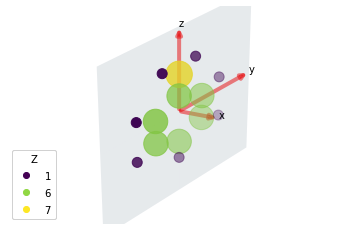

In [5]:
ep.jobSummary(jobInfo, molInfo);

## 1-photon ePS Cross-Sections
Plot 1-photon cross-sections and $beta_2$ parameters (for an unaligned ensemble) from ePS calculations. These are taken directly from the ePS output file, `CrossSection` segments. See the [ePS manual, `GetCro` command, for further details](https://www.chem.tamu.edu/rgroup/lucchese/ePolyScat.E3.manual/GetCro.html).

### Cross-sections by symmetry & type

Types correspond to:

- 'L': length gauge results.
- 'V': velocity gauge results.
- 'M': mixed gauge results.

Symmetries correspond to allowed ionizing transitions for the molecular point group (IRs typically corresponding to (x,y,z) polarization geometries), see the [ePS manual for a list of symmetries](https://www.chem.tamu.edu/rgroup/lucchese/ePolyScat.E3.manual/SymmetryLabels.html). Symmetry `All` corresponds to the sum over all allowed sets of symmetries.

Cross-section units are MBarn.

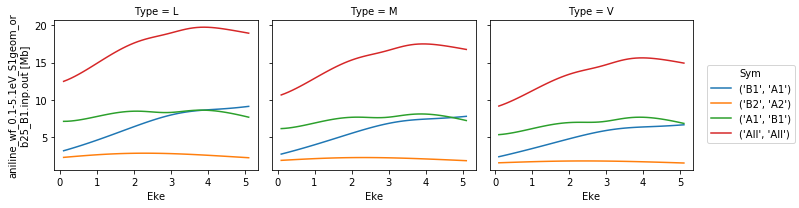

In [6]:
# Plot cross sections using Xarray functionality
# Set here to plot per file - should add some logic to combine files.
for data in dataXS:
    daPlot = data.sel(XC='SIGMA')
    daPlot.plot.line(x='Eke', col='Type')

### $\beta_{2}$ by symmetry & type

Types & symmetries as per cross-sections.  Normalized $\beta_{2}$ paramters, dimensionless.

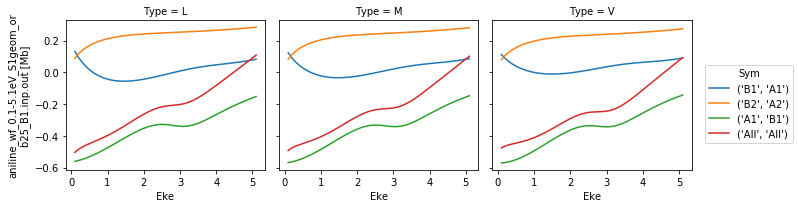

In [7]:
# Repeat for betas
for data in dataXS:
    daPlot = data.sel(XC='BETA')
    daPlot.plot.line(x='Eke', col='Type')

## Dipole matrix elements
For 1-photon ionization. These are taken directly from ePS `DumpIdy` segments. See the [ePS manual, `DumpIdy` command, for further details](https://www.chem.tamu.edu/rgroup/lucchese/ePolyScat.E3.manual/DumpIdy.html).

In [8]:
# Set threshold for significance, only matrix elements with abs values > thres % will be plotted
thres = 0.1

/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/xarray/core/nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Plotting data aniline_wf_0.1-5.1eV_S1geom_orb25_B1.inp.out, pType=a, thres=1.5869580048775138, with Seaborn


/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/xarray/core/nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/numpy/lib/function_base.py:1520: RuntimeWarning: invalid value encountered in greater
  _nx.copyto(ddmod, pi, where=(ddmod == -pi) & (dd > 0))
/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/numpy/lib/function_base.py:1522: RuntimeWarning: invalid value encountered in less
  _nx.copyto(ph_correct, 0, where=abs(dd) < discont)


Plotting data aniline_wf_0.1-5.1eV_S1geom_orb25_B1.inp.out, pType=phaseUW, thres=1.5869580048775138, with Seaborn


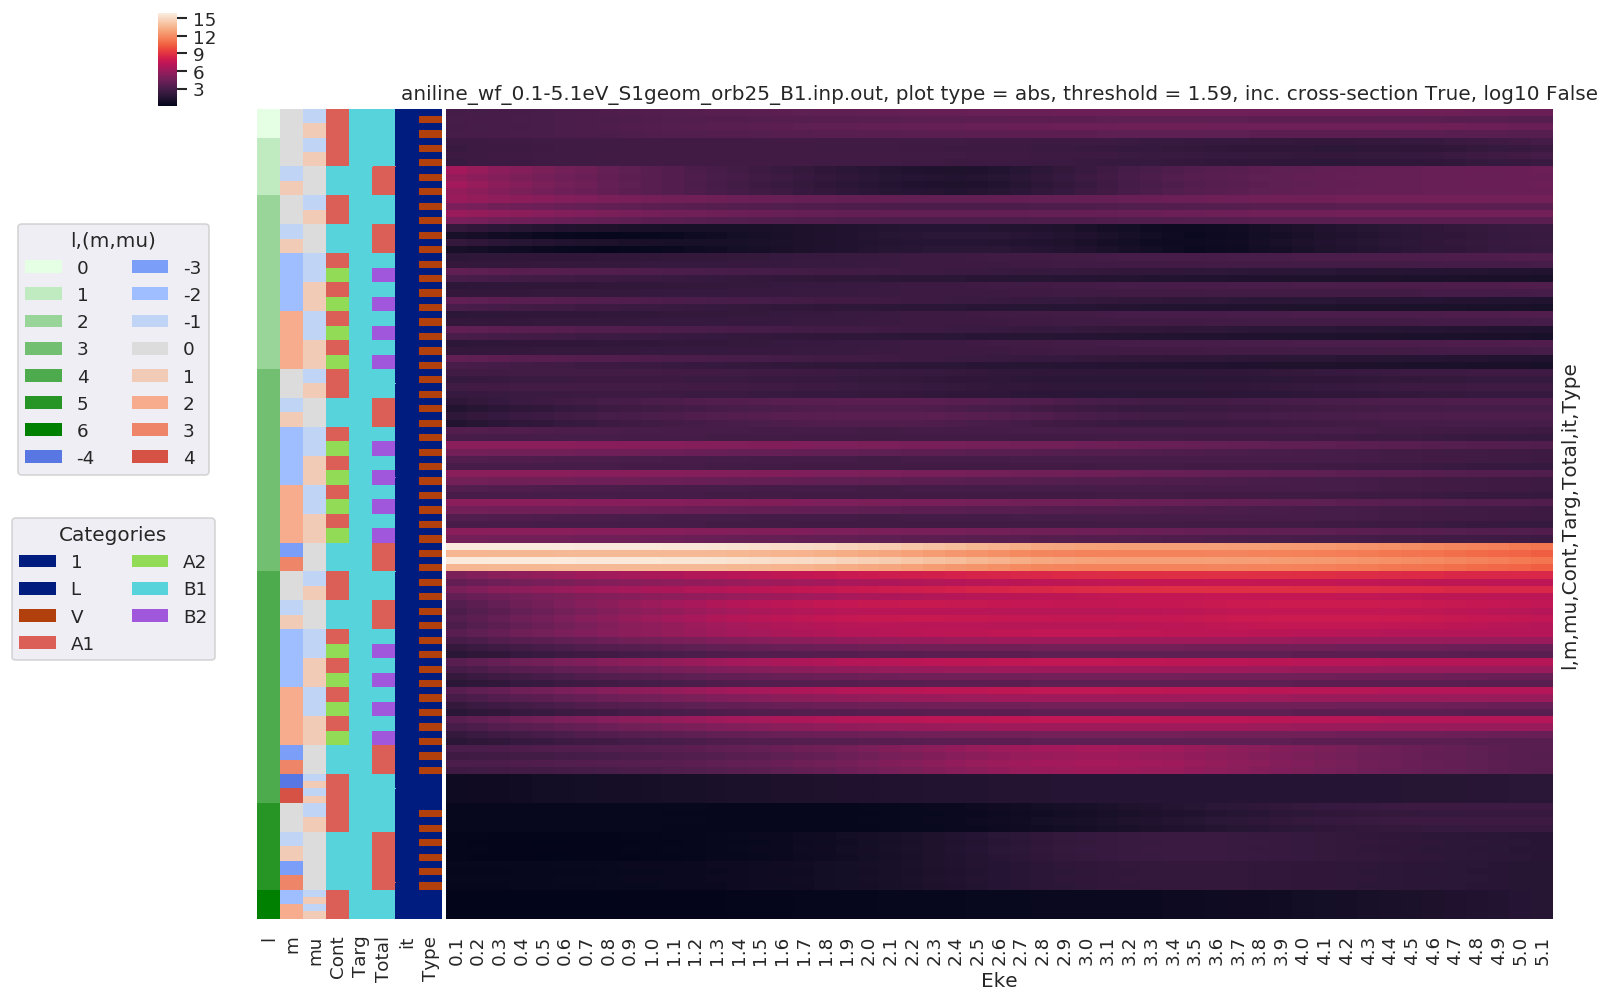

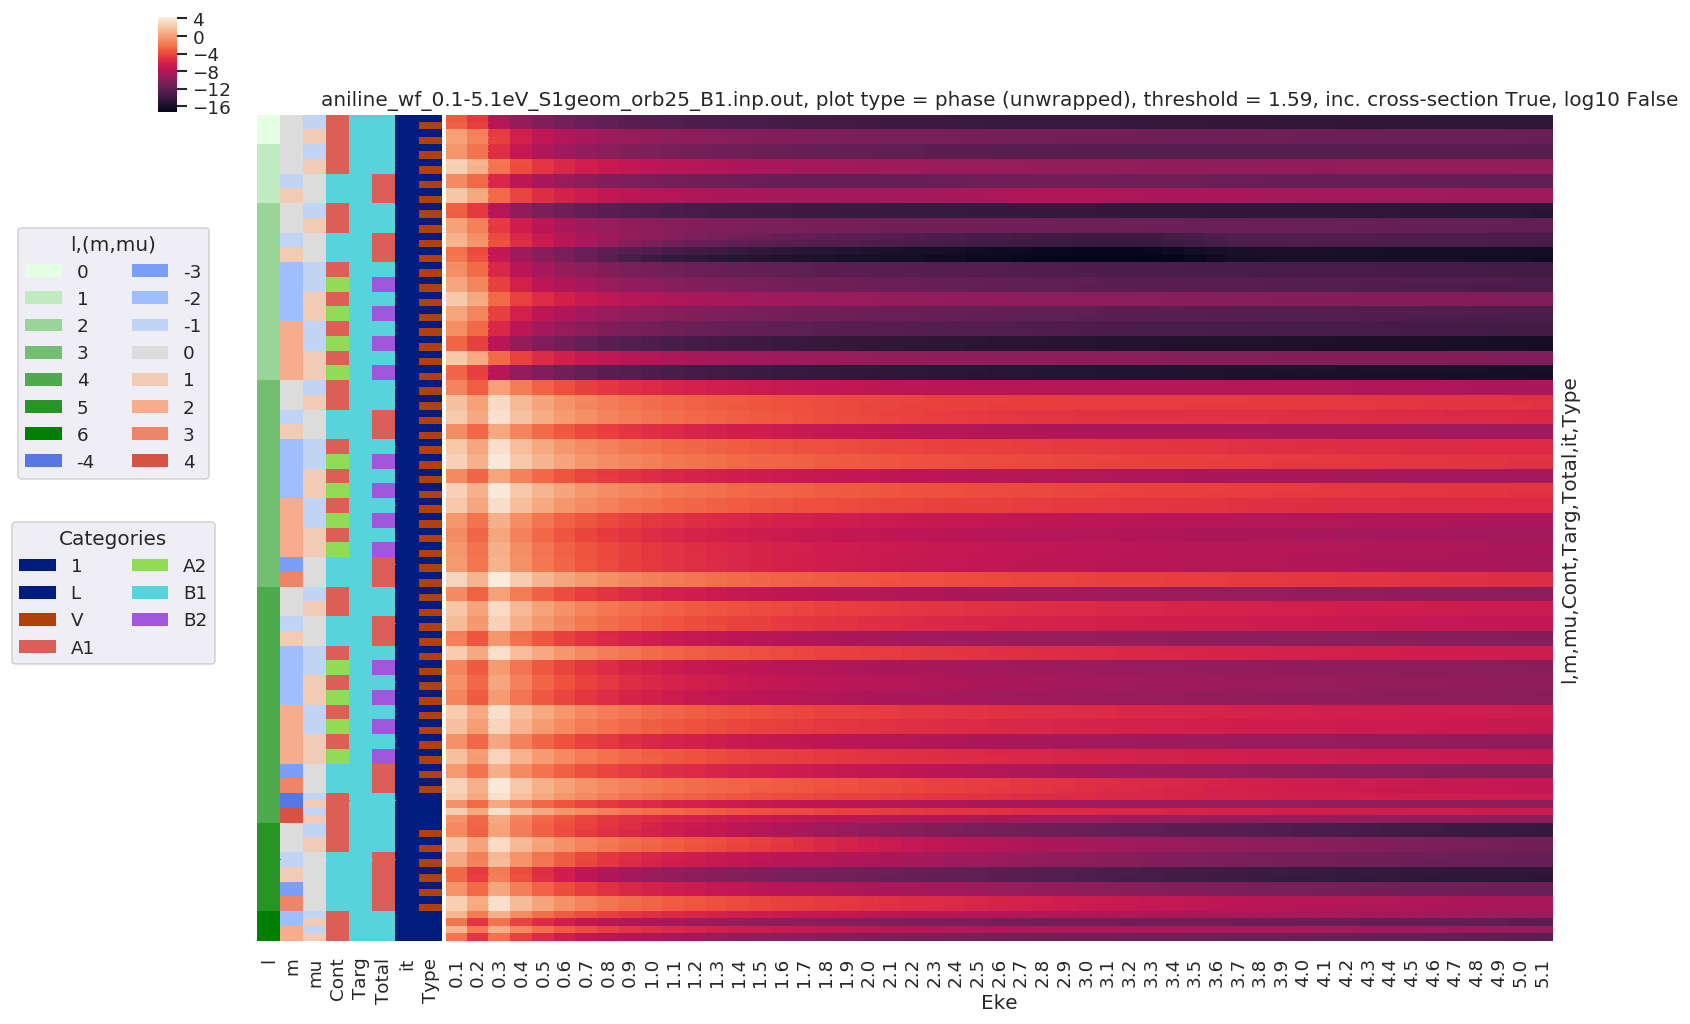

In [9]:
# Plot for each fie
for data in dataMatE:
    # Plot with sensible defaults - all dims with lmPlot()
    
    # Plot only values > theshold
    daPlot, daPlotpd, legendList, gFig = ep.lmPlot(data, thres = thres, thresType = 'pc', figsize = (15,10))

    # Plot phases, with unwrap
    daPlot, daPlotpd, legendList, gFig = ep.lmPlot(data, thres = thres, thresType = 'pc', figsize = (15,10), pType='phaseUW')

## MFPADs

Calculated MF $\beta$ parameters, using ePS dipole matrix elements. These are calculated by `ep.mfblm()`, as a function of energy and polarization geometry. See [the ePSproc docs on `ep.mfblm()`](https://epsproc.readthedocs.io/en/latest/modules/epsproc.MFBLM.html) for further details, and [this demo notebook](https://epsproc.readthedocs.io/en/latest/ePSproc_BLM_calc_demo_Sept2019_rst/ePSproc_BLM_calc_demo_Sept2019.html).

In [10]:
# Set pol geoms - these correspond to (z,x,y) in molecular frame (relative to principle/symmetry axis)
eAngs = ep.setPolGeoms()

In [11]:
# Calculate for each fie & pol geom
# TODO - file logic, and parallelize
BLM = []
for data in dataMatE:
    BLM.append(ep.mfblmEuler(data, selDims = {'Type':'L'}, eAngs = eAngs, thres = thres, 
                             SFflag = True, verbose = 0))  # Run for all Eke, selected gauge only

In [12]:
# Save BLM data - defaults to working dir and 'ep_timestamp' file
# TODO - testing for array/multiple file case
for data in BLM:
    fileName = dataFile + '_BLM-L_' + timeString.strftime('%Y-%m-%d_%H-%M-%S')
    ep.writeXarray(data, fileName = fileName)

['Written to h5netcdf format', '/home/paul/ePS_results/aniline/aniline_wf_0.1-5.1eV_S1geom/aniline_wf_0.1-5.1eV_S1geom_orb25_B1.inp.out_BLM-L_2020-01-11_15-38-55.nc']


/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/h5netcdf/core.py:481: H5pyDeprecationWarning: other_ds.dims.create_scale(ds, name) is deprecated. Use ds.make_scale(name) instead.
  h5ds.dims.create_scale(h5ds, scale_name)


Plotting data aniline_wf_0.1-5.1eV_S1geom_orb25_B1.inp.out, pType=a, thres=0.1, with Seaborn


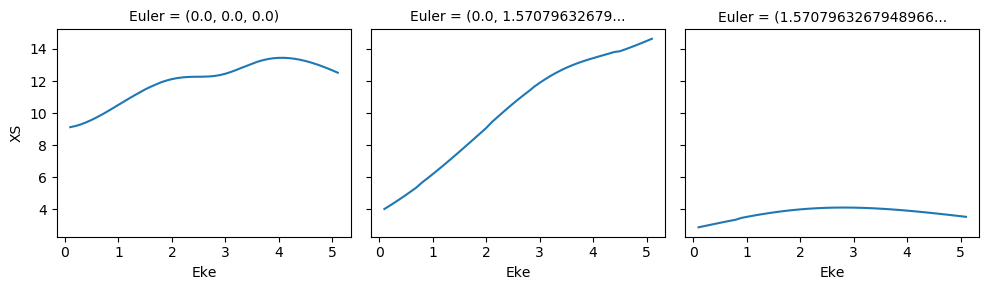

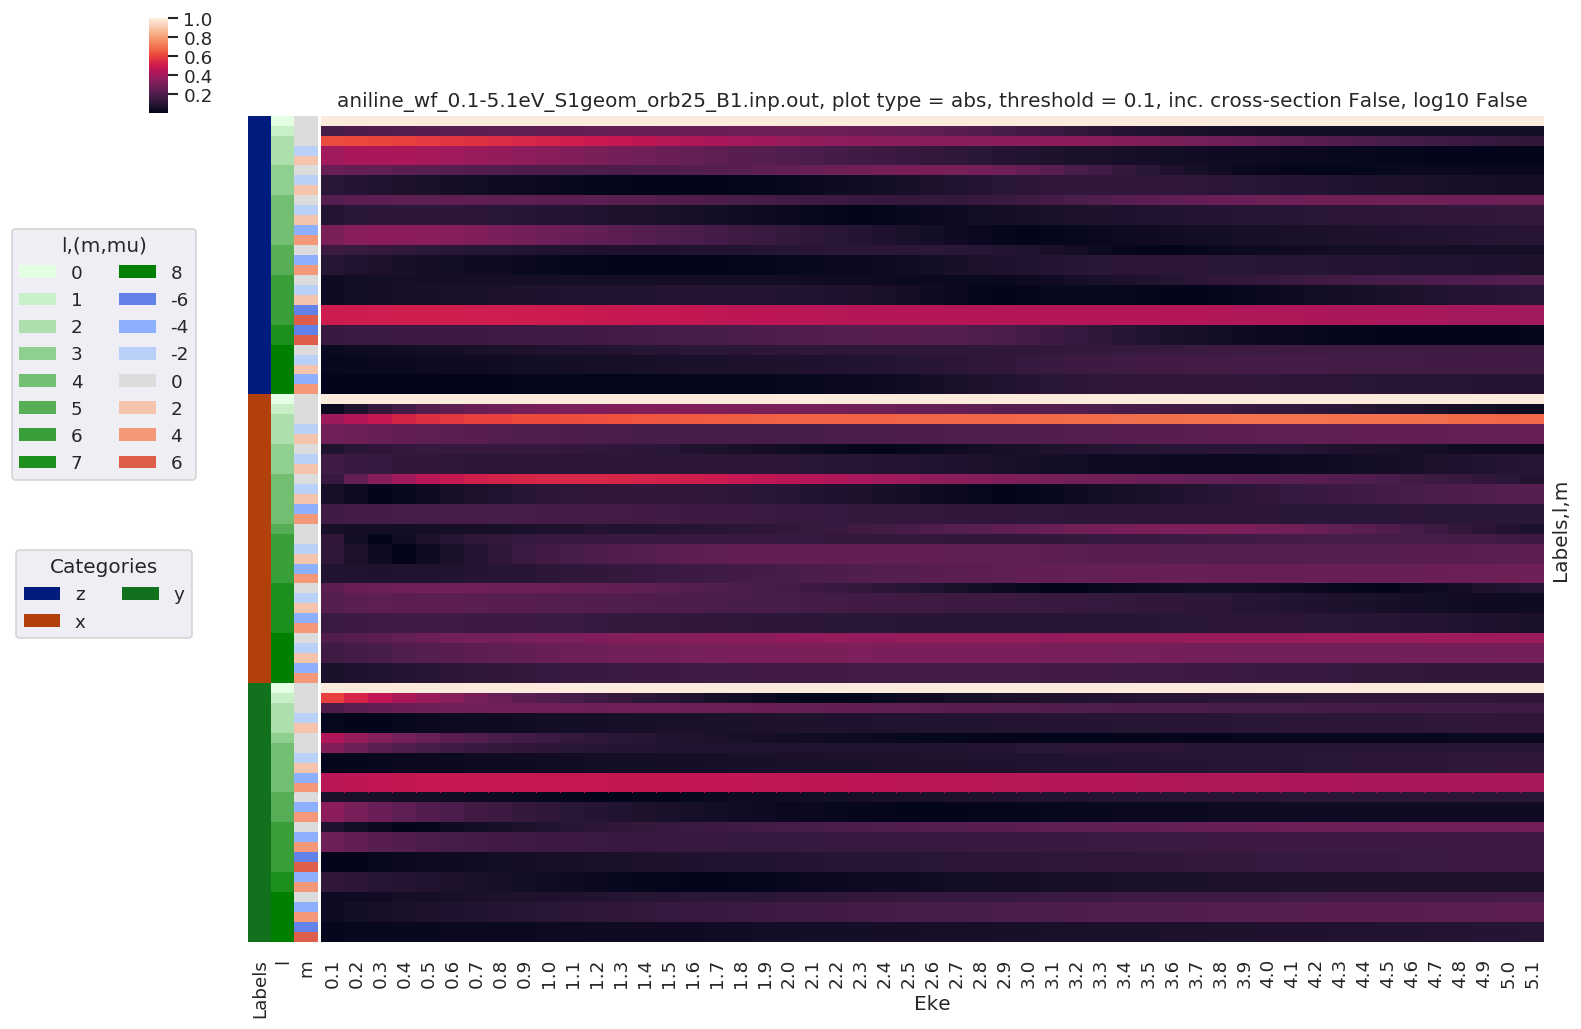

In [13]:
# Normalize and plot results
for BLMplot in BLM:
    # Plot unnormalized B00 only, real part
    # This is/should be in units of MBarn (TBC).
#     BLMplot.where(np.abs(BLMplot) > thres, drop = True).real.squeeze().sel({'l':0, 'm':0}).plot.line(x='Eke', col='Euler');
    BLMplot.XS.real.squeeze().plot.line(x='Eke', col='Euler');

    # Plot values normalised by B00 - now set in calculation function
    # Plot results with lmPlot(), ordering by Euler sets
    # Version with (semi-manual) Euler grouping
    daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMplot.swap_dims({'Euler':'Labels'}), SFflag = False, eulerGroup = True,
                                                   thresType = 'pc', thres = thres,
                                                   plotDims = ('Labels','l','m'), 
                                                   figsize = (15,10))

## Error & consistency checks

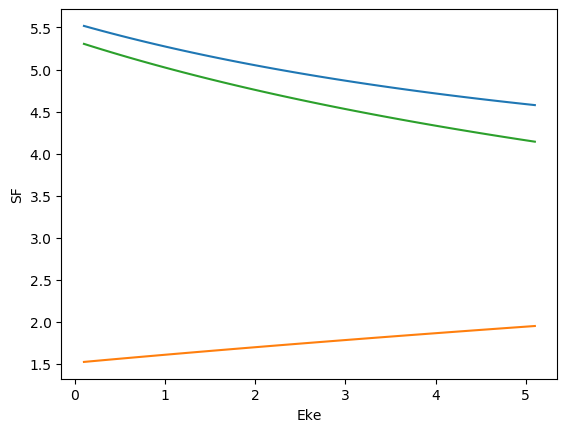

In [14]:
# Check SF values
for data in dataMatE:
    # Plot values, single plot
    data.SF.pipe(np.abs).plot.line(x='Eke')
    data.SF.real.plot.line(x='Eke')
    data.SF.imag.plot.line(x='Eke')
    
    # Plot values, facet plot
#     data.SF.pipe(np.abs).plot.line(x='Eke', col='Sym')


In [15]:
# Compare calculated BLMs for L and V types (dafault above for L)

# Calculate for each fie & pol geom, and compare.
BLMv = []
BLMdiff = []
for n, data in enumerate(dataMatE):
    BLMv.append(ep.mfblmEuler(data, selDims = {'Type':'V'}, eAngs = eAngs, thres = thres, 
                             SFflag = True, verbose = 0))  # Run for all Eke, selected gauge only
    
    BLMdiff.append(BLM[n] - BLMv[n])
    BLMdiff[n]['dXS'] = BLM[n].XS - BLMv[n].XS  # Set XS too, dropped in calc above

    BLMdiff[n].attrs['dataType'] = 'matE'

In [16]:
# Save BLM data - defaults to working dir and 'ep_timestamp' file
# TODO - testing for array/multiple file case
for data in BLMv:
    fileName = dataFile + '_BLM-V_' + timeString.strftime('%Y-%m-%d_%H-%M-%S')
    ep.writeXarray(data, fileName = fileName)

['Written to h5netcdf format', '/home/paul/ePS_results/aniline/aniline_wf_0.1-5.1eV_S1geom/aniline_wf_0.1-5.1eV_S1geom_orb25_B1.inp.out_BLM-V_2020-01-11_15-38-55.nc']


/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/h5netcdf/core.py:481: H5pyDeprecationWarning: other_ds.dims.create_scale(ds, name) is deprecated. Use ds.make_scale(name) instead.
  h5ds.dims.create_scale(h5ds, scale_name)


Plotting data aniline_wf_0.1-5.1eV_S1geom_orb25_B1.inp.out, pType=a, thres=0.1, with Seaborn


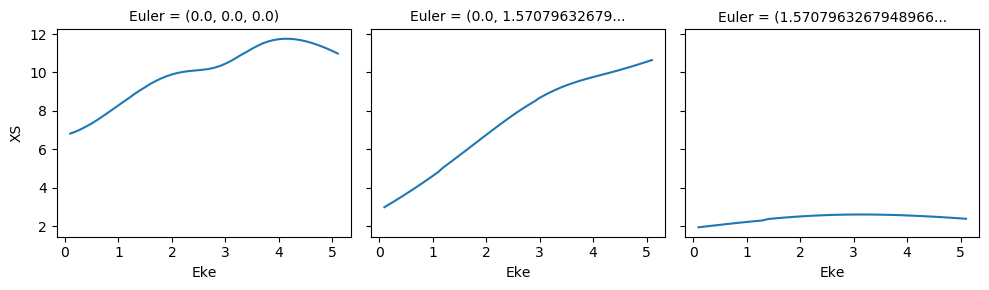

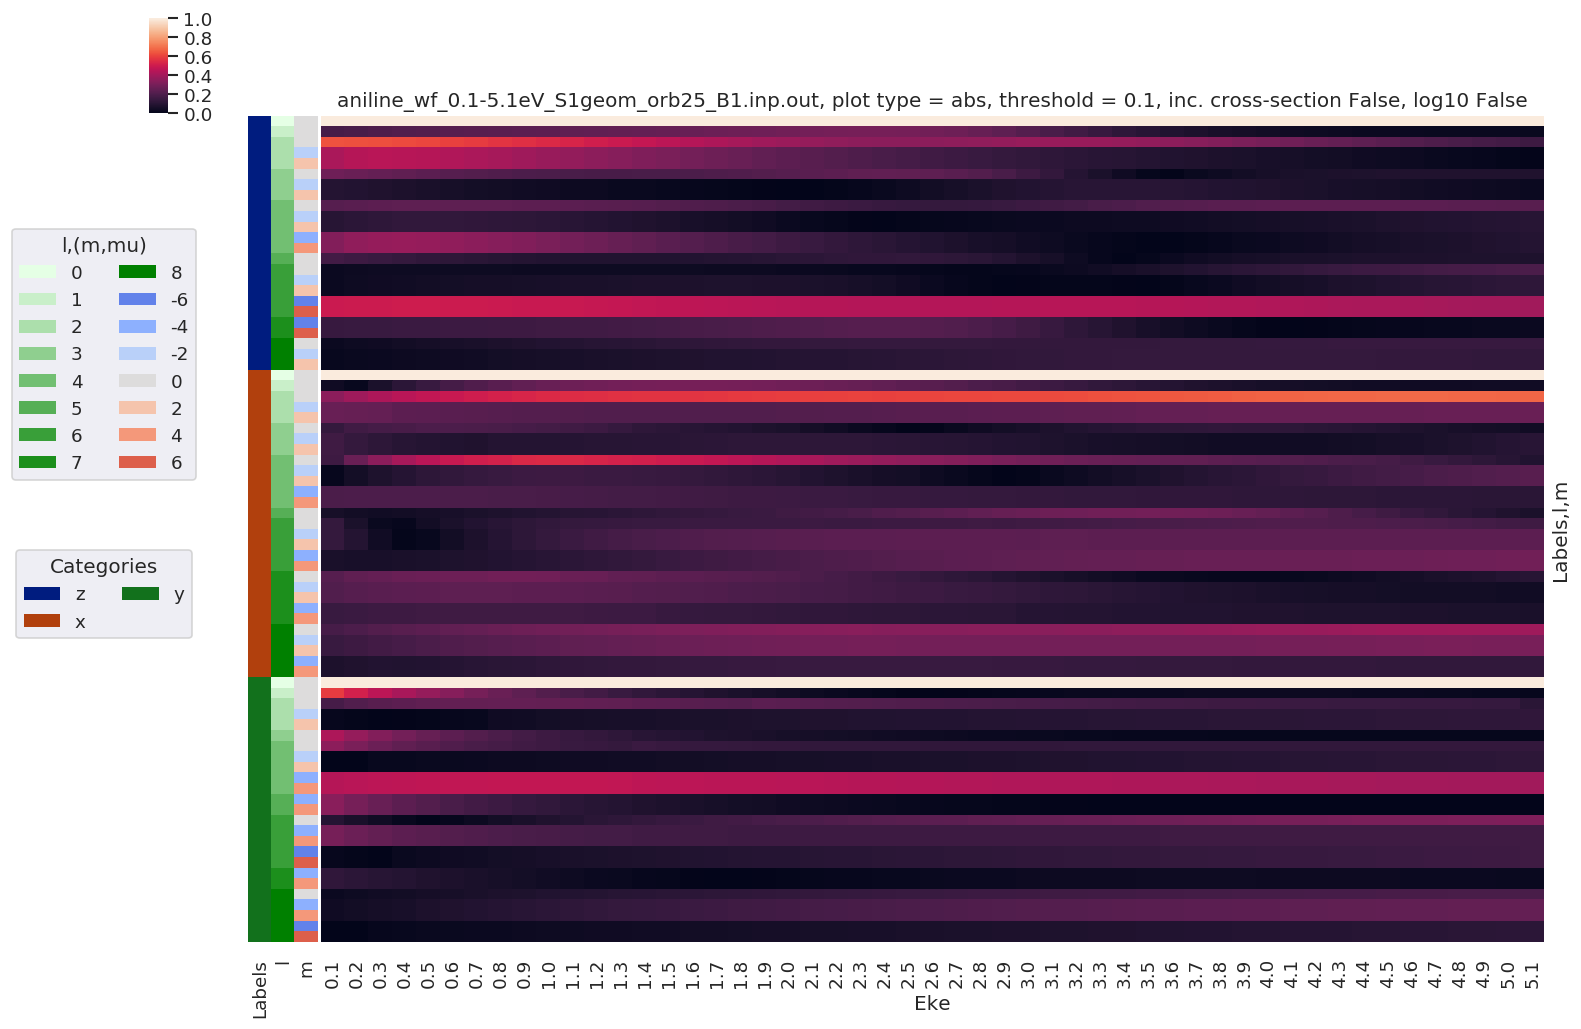

In [17]:
# Normalize and plot results
for BLMplot in BLMv:
    # Plot unnormalized B00 only, real part
    # This is/should be in units of MBarn (TBC).
#     BLMplot.where(np.abs(BLMplot) > thres, drop = True).real.squeeze().sel({'l':0, 'm':0}).plot.line(x='Eke', col='Euler');
    BLMplot.XS.real.squeeze().plot.line(x='Eke', col='Euler');

    # Plot values normalised by B00 - now set in calculation function
    # Plot results with lmPlot(), ordering by Euler sets
    # Version with (semi-manual) Euler grouping
    daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMplot.swap_dims({'Euler':'Labels'}), SFflag = False, eulerGroup = True,
                                                   thresType = 'pc', thres = thres,
                                                   plotDims = ('Labels','l','m'), 
                                                   figsize = (15,10))

Differences, L vs. V gauge BLMs
Max difference in BLMs (L-V): 0 (0.10900060941065681-4.419714928595934e-17j)
Plotting data (No filename), pType=a, thres=0.010900060941065682, with Seaborn


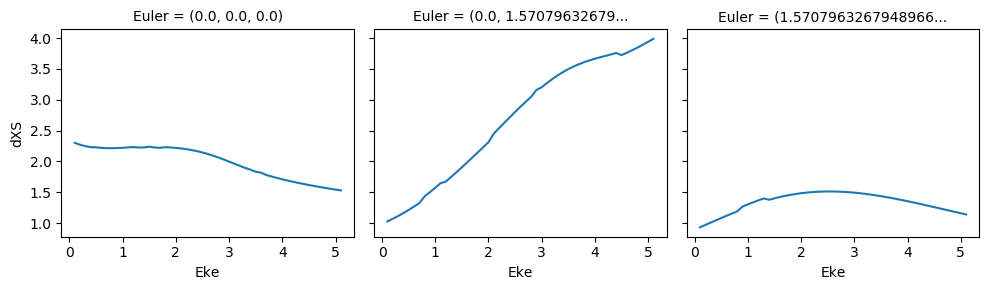

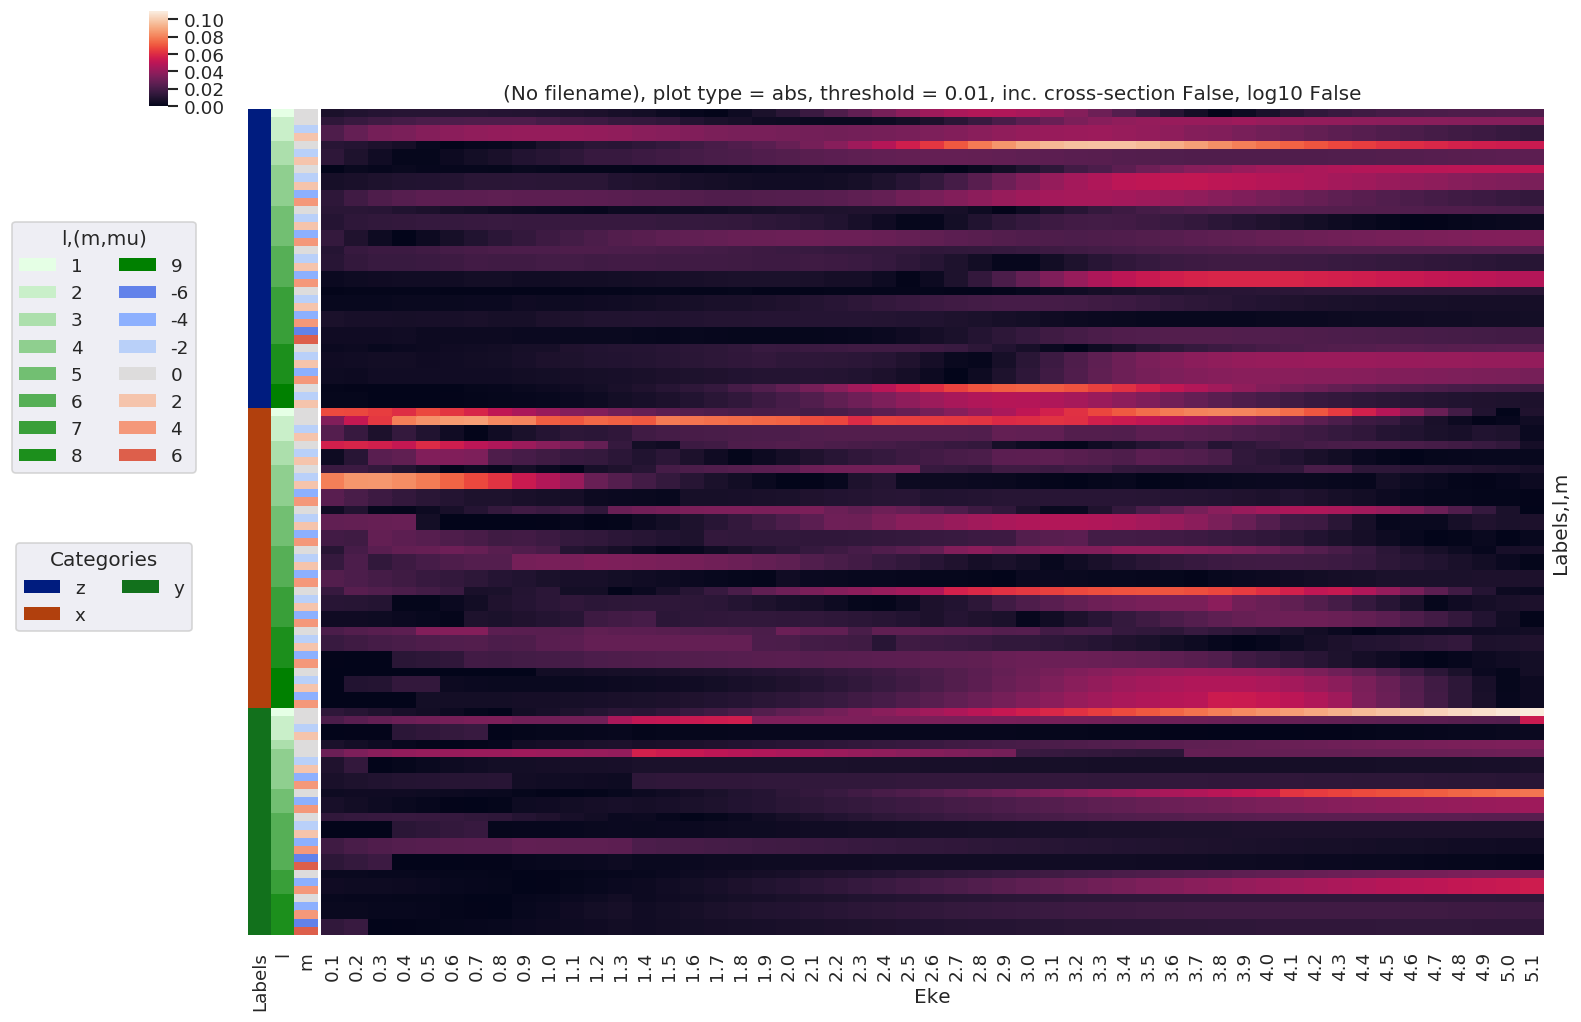

In [18]:
# Difference between 'L' and 'V' results
# NOTE - this currently drops XS

print('Differences, L vs. V gauge BLMs')

for BLMplot in BLMdiff:
    maxDiff = BLMplot.max()
    print(f'Max difference in BLMs (L-V): {0}', maxDiff.data)
    
    if np.abs(maxDiff) > thres:
        # Plot B00 only, real part
#         BLMplot.where(np.abs(BLMplot) > thres, drop = True).real.squeeze().sel({'l':0, 'm':0}).plot.line(x='Eke', col='Euler');
        BLMplot.dXS.real.squeeze().plot.line(x='Eke', col='Euler');

        # Plot values normalised by B00 - now set in calculation function
        # Plot results with lmPlot(), ordering by Euler sets
        # Version with (semi-manual) Euler grouping
        daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMplot.swap_dims({'Euler':'Labels'}), SFflag = False, eulerGroup = True,
                                                       thresType = 'pc', thres = thres,
                                                       plotDims = ('Labels','l','m'), 
                                                       figsize = (15,10))


Machine tolerance:  2.220446049250313e-16
Max imaginary value: 0 2.2707070603973064e-16


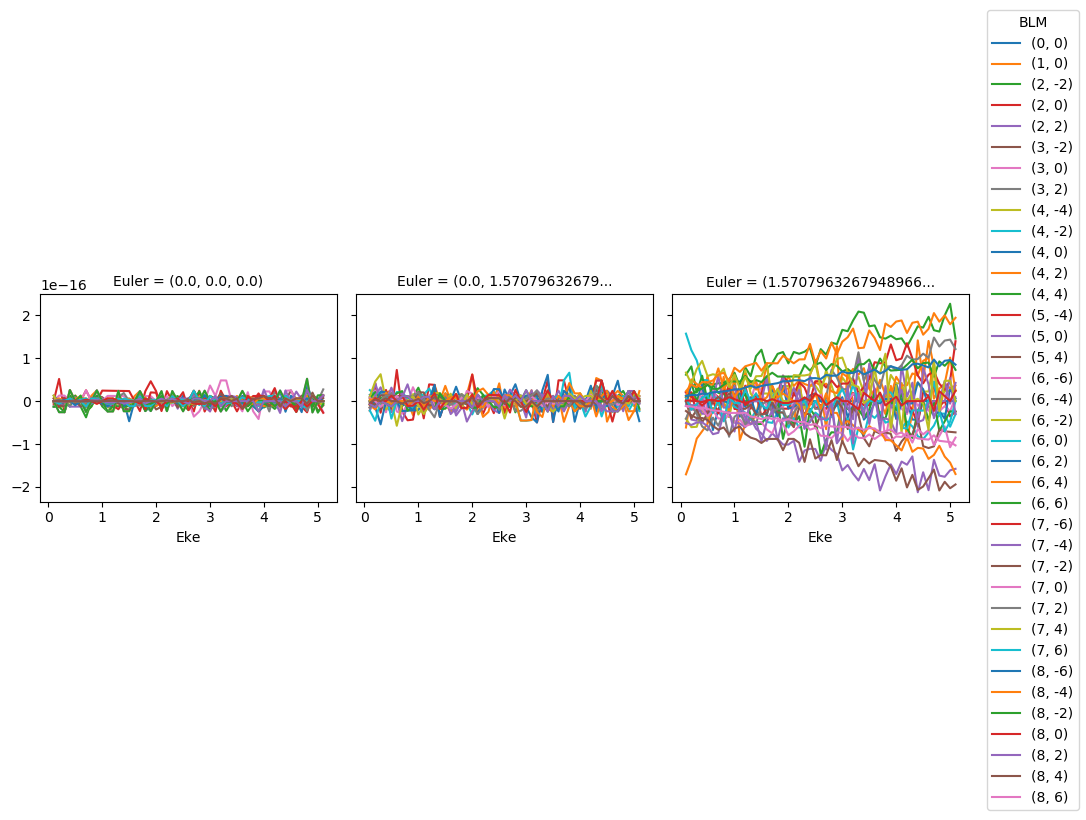

In [19]:
# Check imaginary components - should be around machine tolerance.
print('Machine tolerance: ', np.finfo(float).eps)
for BLMplot in BLM:
    maxImag = BLMplot.imag.max()
    print(f'Max imaginary value: {0}', maxImag.data)
    
#     BLMplot.where(np.abs(BLMplot) > thres, drop = True).imag.squeeze().plot.line(x='Eke', col='Euler');
    
    BLMplot = ep.matEleSelector(BLMplot, thres=thres, dims = 'Eke')
    BLMplot.imag.squeeze().plot.line(x='Eke', col='Euler');

## Version info

### Original job details

In [20]:
print(jobInfo['ePolyScat'][0])
print('Run: ' + jobInfo['Starting'][0].split('at')[1])

ePolyScat Version E3
Run:  2019-04-14  12:21:47.163 (GMT -0400)


### ePSproc details

In [21]:
templateVersion = '0.0.5'
templateDate = '10/01/20'

In [22]:
%load_ext version_information

In [23]:
%version_information epsproc, xarray

Software versions
Python 3.7.5 64bit [GCC 7.3.0]
IPython 7.9.0
OS Linux 5.0.0 36 generic x86_64 with debian buster sid
epsproc 1.2.3
xarray 0.14.0
Sat Jan 11 19:13:11 2020 EST

In [24]:
print('Run: {}'.format(timeString.strftime('%Y-%m-%d_%H-%M-%S')))
host = !hostname
print('Host: {}'.format(host[0]))

Run: 2020-01-11_15-38-55
Host: jake
